<a href="https://colab.research.google.com/github/botkin92/Python_Libraries_for_Data_Science/blob/Final_project/rf_model_ver1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [707]:
import numpy as np
import pandas as pd

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

from matplotlib import pyplot as plt
import seaborn as sns

In [708]:
import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [709]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [710]:
train_df = pd.read_csv('MyDrive/Python Libraries for Data Science/train.csv')
test_df = pd.read_csv('MyDrive/Python Libraries for Data Science/test.csv')

## 1. EDA

In [711]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [712]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

### Целевая переменная

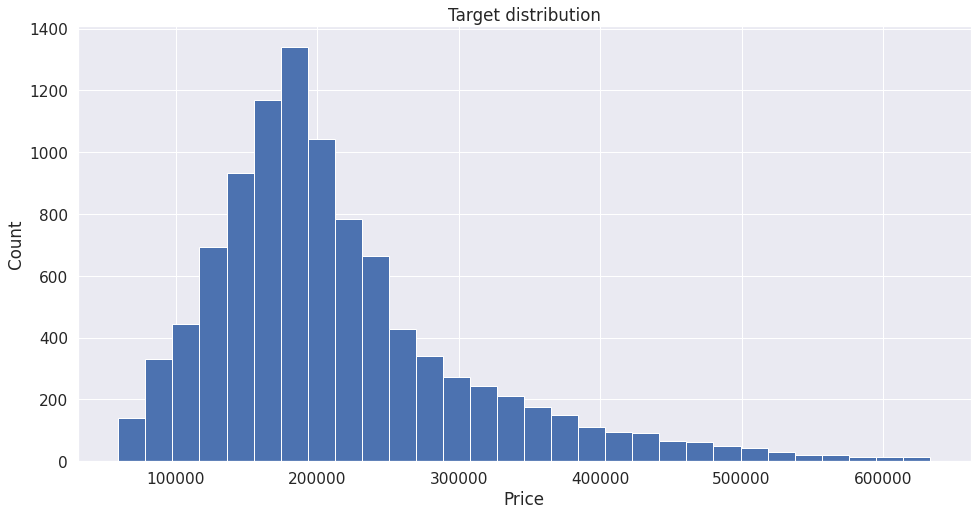

In [713]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

### Признаки

In [714]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [715]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


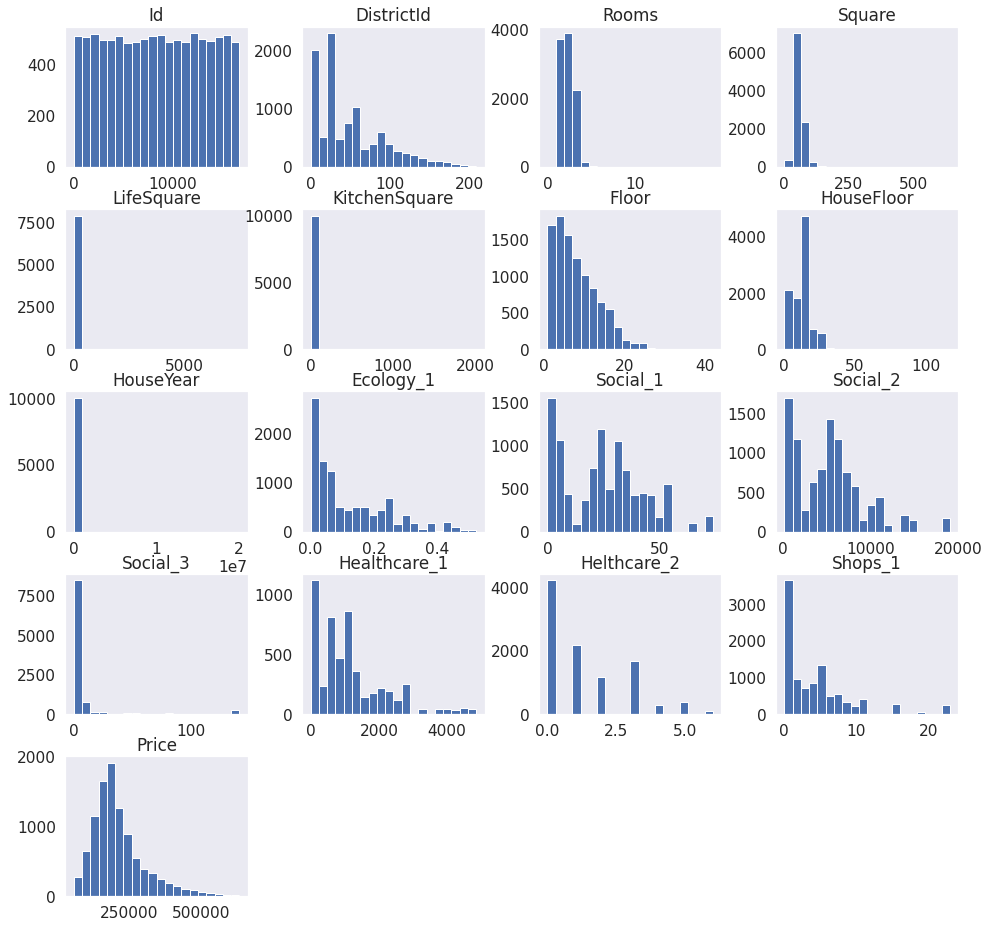

In [716]:
train_df.hist(figsize=(16,16), bins=20, grid=False);

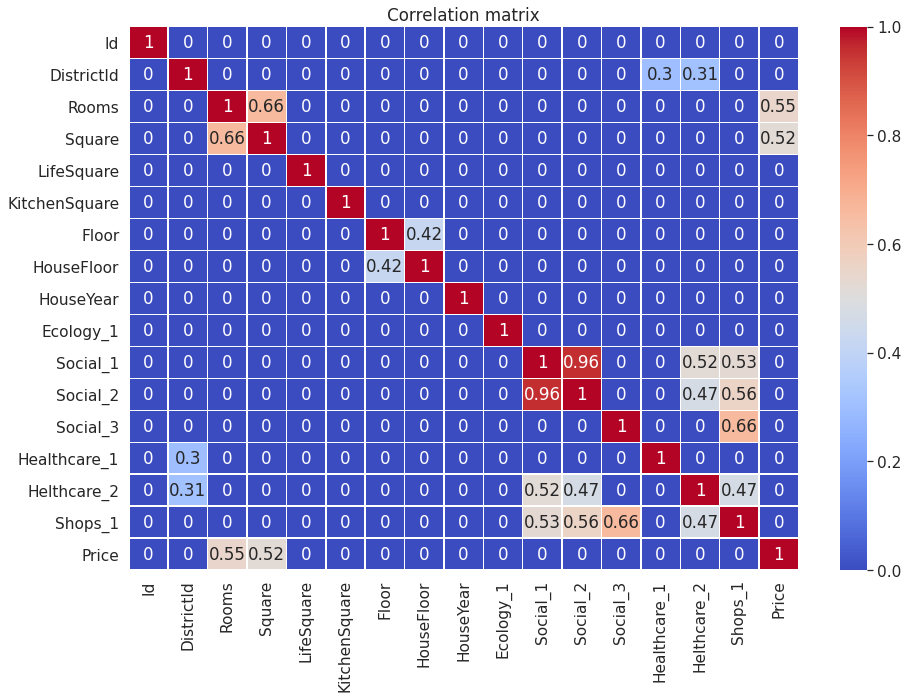

In [717]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

## 2. Предобработка данных

### Заполнение пропусков

In [718]:
train_df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

#### LifeSquare

In [719]:
train_df.loc[train_df['LifeSquare'].isna(), 'LifeSquare'] = train_df['Square'] - train_df['KitchenSquare'] - 3

#### Healthcare_1

In [720]:
# Значительное количество тренировочных данных (48 %) признака Healthcare_1 пропушено. Поэтому лучше просто не использовать этот признак в модели.
train_df.drop('Healthcare_1', axis=1, inplace=True)

In [721]:
train_df.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

### Обработка выбросов

#### Rooms

In [722]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [723]:
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 8, 'Rooms'] = train_df['Rooms'].median()

In [724]:
train_df['Rooms'].value_counts()

2.0    3883
1.0    3713
3.0    2235
4.0     150
5.0      18
6.0       1
Name: Rooms, dtype: int64

#### Square

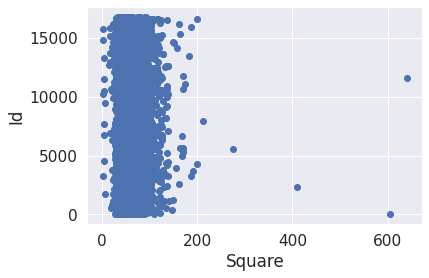

In [725]:
# Визуальная оценка и определение "доверительного" диапазона
# train_df['Square'].hist(bins=20)
plt.scatter(train_df['Square'], train_df['Id'])
plt.ylabel('Id')
plt.xlabel('Square')

# plt.title('Square')
plt.show()

In [726]:
# train_df.loc[train_df['Square'] > train_df['Square'].quantile(.99), 'Square'].sort_values()

In [727]:
train_df['Square'].sort_values()

7470      1.136859
4496      1.988943
9869      2.377248
8572      2.596351
161       2.954309
           ...    
7644    212.932361
1906    275.645284
7010    409.425181
726     604.705972
9229    641.065193
Name: Square, Length: 10000, dtype: float64

In [728]:
train_df.loc[train_df['Square'] < 15, 'Square'] = 15
train_df.loc[train_df['Square'] > 250, 'Square'] = train_df['Square'].mean()

In [729]:
# Проверочный запрос
train_df['Square'].sort_values()

7033     15.000000
7470     15.000000
1401     15.000000
161      15.000000
4800     15.000000
           ...    
8011    186.692602
1606    190.857689
9307    198.930182
1776    200.334539
7644    212.932361
Name: Square, Length: 10000, dtype: float64

#### LifeSquare

In [730]:
# 1. Проверка на корректность: жилая площадь не может быть больше общей площади.
train_df.loc[train_df['LifeSquare'] > train_df['Square'], ('LifeSquare', 'Square')].head(10)

,LifeSquare,Square
33,74.131261,73.314975
64,87.730225,87.200625
77,39.624493,38.467276
100,82.931595,79.937665
111,32.514021,28.438794
142,100.855911,98.649404
165,47.483236,44.995130
179,91.796522,90.144106
213,62.898664,61.735728
262,64.253870,62.869676


In [731]:
train_df.loc[train_df['LifeSquare'] > train_df['Square'], 'LifeSquare'] = train_df['Square']
# condition = (train_df['LifeSquare'] < 15) | (train_df['LifeSquare'] > 250) \
# | train_df.loc[train_df['LifeSquare'] > train_df['Square']

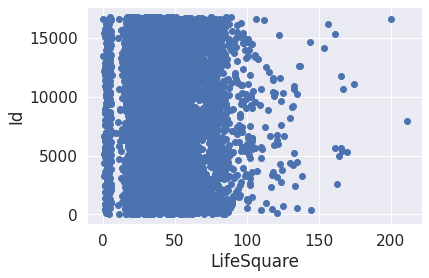

In [732]:
# 2. Визуальная оценка и определение "доверительного" диапазона
# train_df['LifeSquare'].hist(bins=20)
plt.scatter(train_df['LifeSquare'], train_df['Id'])
plt.ylabel('Id')
plt.xlabel('LifeSquare')

# plt.title('LifeSquare')
plt.show()

In [733]:
train_df['LifeSquare'].sort_values()

682      -0.140758
3113      0.370619
1829      0.641822
119       0.795539
9869      0.873147
           ...    
5258    167.016872
8872    169.509941
5283    174.649522
1776    200.334539
7644    211.231125
Name: LifeSquare, Length: 10000, dtype: float64

In [734]:
# train_df.loc[train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.999), 'LifeSquare'].head(10)

In [735]:
train_df.loc[train_df['LifeSquare'] < 15, 'LifeSquare'] = 15
train_df.loc[train_df['LifeSquare'] > 250, 'LifeSquare'] = train_df['LifeSquare'].mean()

#### KitchenSquare

In [736]:
train_df['KitchenSquare'].sort_values()

2178       0.0
5612       0.0
519        0.0
8814       0.0
3709       0.0
         ...  
7733     112.0
5002     112.0
286      123.0
6505    1970.0
9520    2014.0
Name: KitchenSquare, Length: 10000, dtype: float64

In [737]:
# 1. Проверка на корректность: площадь кухни не может быть больше общей площади.
train_df.loc[train_df['KitchenSquare'] > train_df['Square'], ('KitchenSquare', 'Square')].head()

,KitchenSquare,Square
2785,84.0,38.220258
5273,73.0,38.071692
6505,1970.0,32.276663
9520,2014.0,47.100719


In [738]:
# Для данного расчета необходимо заполнить пропуски по LifeSquare
train_df.loc[train_df['KitchenSquare'] > train_df['Square'], 'KitchenSquare'] = train_df['Square'] \
                                            - train_df['LifeSquare']

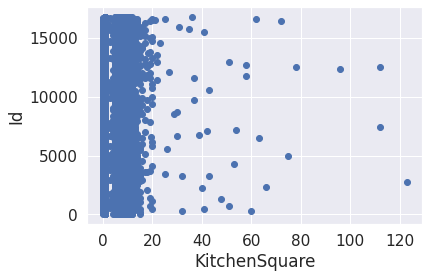

In [739]:
# 2. Визуальная оценка и определение "доверительного" диапазона
# train_df['KitchenSquare'].hist(bins=20)
plt.scatter(train_df['KitchenSquare'], train_df['Id'])
plt.ylabel('Id')
plt.xlabel('KitchenSquare')

# plt.title('KitchenSquare')
plt.show()

In [740]:
train_df['KitchenSquare'].value_counts().sort_index()

0.000000       697
0.652759         1
1.000000      2460
2.000000         4
3.000000        22
4.000000        39
5.000000      1169
6.000000      1038
7.000000       609
8.000000      1306
9.000000       843
10.000000     1075
11.000000      233
12.000000      249
12.998269        1
13.000000       67
14.000000       51
15.000000       31
16.000000       16
17.000000       12
18.000000        6
18.348144        1
19.000000       11
19.503403        1
20.000000       14
21.000000        1
22.000000        3
23.000000        1
25.000000        2
26.000000        1
27.000000        1
29.000000        1
30.000000        2
31.000000        1
32.000000        2
35.000000        1
36.000000        1
37.000000        2
39.000000        1
40.000000        1
41.000000        2
42.000000        1
43.000000        2
48.000000        1
51.000000        2
53.000000        1
54.000000        1
58.000000        2
60.000000        1
62.000000        1
63.000000        1
66.000000        1
72.000000   

In [741]:
train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
train_df.loc[train_df['KitchenSquare'] > 70, 'KitchenSquare'] = train_df['KitchenSquare'].median()

#### HouseFloor

In [742]:
# 1. Проверка на корректность: этаж квартиры не может быть больше количества этажей в доме.
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], ('Floor', 'HouseFloor')].head()

,Floor,HouseFloor
17,6,5.0
19,16,14.0
21,11,9.0
24,2,0.0
25,18,1.0


In [743]:
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'Floor'] = train_df['HouseFloor']

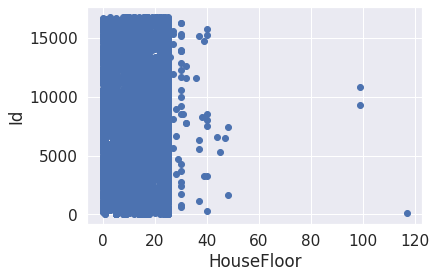

In [744]:
# 2. Визуальная оценка и определение "доверительного" диапазона
# train_df['HouseFloor].hist(bins=20)
plt.scatter(train_df['HouseFloor'], train_df['Id'])
plt.ylabel('Id')
plt.xlabel('HouseFloor')

# plt.title('HouseFloor')
plt.show()

In [745]:
train_df['HouseFloor'].value_counts().sort_index()

0.0       269
1.0       497
2.0        48
3.0       127
4.0       134
5.0      1031
6.0        58
7.0        59
8.0       141
9.0      1389
10.0      135
11.0       28
12.0     1074
13.0       27
14.0      625
15.0      123
16.0      576
17.0     2331
18.0       89
19.0      108
20.0      105
21.0       33
22.0      343
23.0       40
24.0      176
25.0      374
26.0        1
27.0        6
28.0        3
29.0        1
30.0       21
31.0        1
32.0        4
36.0        1
37.0        4
38.0        1
39.0        2
40.0        7
44.0        1
45.0        1
47.0        1
48.0        2
99.0        2
117.0       1
Name: HouseFloor, dtype: int64

In [746]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = 1
train_df.loc[train_df['HouseFloor'] > 50, 'HouseFloor'] = train_df['HouseFloor'].median()

#### HouseYear

In [747]:
train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [748]:
train_df.loc[train_df['HouseYear'] == 4968, 'HouseYear'] = 1968
train_df.loc[train_df['HouseYear'] == 20052011, 'HouseYear'] = 2011

In [749]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

#### class DataPreprocessing

In [750]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians=None
        self.means=None
        # self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.means = X.mean()
        # self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 8, 'Rooms'] = self.medians['Rooms']

        # Square
        X.loc[X['Square'] < 15, 'Square'] = 15
        X.loc[X['Square'] > 250, 'Square'] = self.means['Square']

        # LifeSquare

        X.loc[X['LifeSquare'].isna(), 'LifeSquare'] = X['Square'] - X['KitchenSquare'] - 3

        X.loc[X['LifeSquare'] > X['Square'], 'LifeSquare'] = X_train['Square']
        X.loc[X['LifeSquare'] < 15, 'LifeSquare'] = 15
        X.loc[X['LifeSquare'] > 250, 'LifeSquare'] = self.means['LifeSquare']

        # KitchenSquare
        X.loc[X['KitchenSquare'] > X['Square'], 'KitchenSquare'] = X['Square'] - X['LifeSquare']
        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        X.loc[X['KitchenSquare'] > 70, 'KitchenSquare'] = self.medians['KitchenSquare']

        # HouseFloor
        X.loc[X['Floor'] > X['HouseFloor'], 'Floor'] = X['HouseFloor']
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = 1
        X.loc[X['HouseFloor'] > 50, 'HouseFloor'] = self.medians['HouseFloor']

        # HouseYear

        current_year = datetime.now().year

        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year

        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
        
        
        X.fillna(self.medians, inplace=True)
        
        return X

### Построение новых признаков

#### Ecology_2, Ecology_3, Shops_2

In [751]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

In [752]:
train_df['Id'] = train_df['Id'].astype('object')
train_df['DistrictId'] = train_df['DistrictId'].astype('object')

train_df['Ecology_2'] = train_df['Ecology_2'].astype('category')
train_df['Ecology_3'] = train_df['Ecology_3'].astype('category')
train_df['Shops_2'] = train_df['Shops_2'].astype('category')

#### Social_1 & Social_2

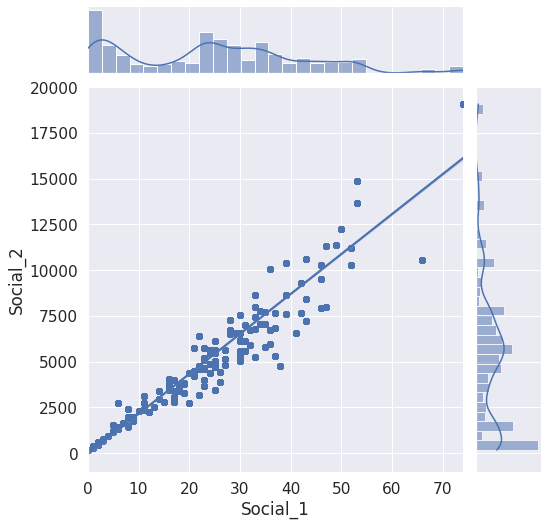

In [753]:
grid = sns.jointplot(train_df['Social_1'], train_df['Social_2'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [754]:
train_df_pca = train_df[['Social_1', 'Social_2']]
pca = PCA(n_components=1,  random_state=42)

train_df['Social_PCA'] = pca.fit_transform(train_df_pca)

train_df['Social_PCA'].head()

0   -2255.194923
1     854.857346
2     -91.121828
3   -5088.211968
4    3314.848372
Name: Social_PCA, dtype: float64

#### Low_rise

In [755]:
train_df['Low_rise'] = 0
train_df.loc[train_df['HouseFloor'] < 3, 'Low_rise'] = 1

In [756]:
train_df['Low_rise'] = train_df['Low_rise'].astype('category')

#### Last floor

In [757]:
train_df['last_floor'] = 0
train_df.loc[(train_df['HouseFloor'] > 17) & (train_df['Floor'] == train_df['HouseFloor']), 'last_floor'] = 1

In [758]:
med_price_by_last_floor = train_df.groupby(['last_floor'], as_index=False).agg({'Price':'median'})
med_price_by_last_floor

,last_floor,Price
0,0,191936.643369
1,1,251294.166444


#### HouseYear category

In [759]:
def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1945, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2017), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2017), 'year_cat'] = 5

    X['year_cat'] = X['year_cat'].astype('category')

    return X

In [760]:
train_df = year_to_cat(train_df)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Social_PCA,Low_rise,last_floor,year_cat
0,11809,27,3.0,115.027311,102.027311,10.0,4.0,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,-2255.194923,0,0,4
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,854.857346,0,0,2
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,-91.121828,0,0,3
3,2352,1,1.0,40.409907,36.409907,3.0,10.0,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,-5088.211968,0,0,2
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,3314.848372,0,0,2


In [761]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  object  
 1   DistrictId     10000 non-null  object  
 2   Rooms          10000 non-null  float64 
 3   Square         10000 non-null  float64 
 4   LifeSquare     10000 non-null  float64 
 5   KitchenSquare  10000 non-null  float64 
 6   Floor          10000 non-null  float64 
 7   HouseFloor     10000 non-null  float64 
 8   HouseYear      10000 non-null  int64   
 9   Ecology_1      10000 non-null  float64 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int64   
 13  Social_2       10000 non-null  int64   
 14  Social_3       10000 non-null  int64   
 15  Helthcare_2    10000 non-null  int64   
 16  Shops_1        10000 non-null  int64   
 17  Shops_2        10000 non-null  c

#### class FeatureGenetator

In [762]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.binary_to_numbers = None
        self.pca_features = None
                
    def fit(self, X):
        
        # X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # PCA 1-comp features
        self.pca_features = PCA(n_components=1,  random_state=42)

    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # X_for_pca = X[['Social_1', 'Social_2']]
        X['Social_PCA'] = self.pca_features.fit_transform(X.loc[:,['Social_1', 'Social_2']])

        # Low rise
        X['Low_rise'] = 0
        X.loc[X['HouseFloor'] < 3, 'Low_rise'] = 1
        
        # Last floor
        X['last_floor'] = 0
        X.loc[(X['HouseFloor'] > 17) & (X['Floor'] == X['HouseFloor']),\
                     'last_floor'] = 1

        # HouseYear category
        X['year_cat'] = 0

        X.loc[X['HouseYear'] <= 1945, 'year_cat'] = 1
        X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 2
        X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 3
        X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2017), 'year_cat'] = 4
        X.loc[(X['HouseYear'] > 2017), 'year_cat'] = 5

        # .astype
        X['Ecology_2'] = X['Ecology_2'].astype('category')
        X['Ecology_3'] = X['Ecology_3'].astype('category')
        X['Shops_2'] = X['Shops_2'].astype('category')
        X['Low_rise'] = X['Low_rise'].astype('category')
        X['last_floor'] = X['last_floor'].astype('category')
        X['year_cat'] = X['year_cat'].astype('category')
       
        return X

### Отбор признаков

In [763]:
target_name = 'Price'
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'Ecology_1', 'Ecology_2', \
                 'Ecology_3', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2', 'Social_PCA', 'Low_rise', 'last_floor', 'year_cat']

### Разбиение на train / valid

In [764]:
train_df = pd.read_csv('MyDrive/Python Libraries for Data Science/train.csv')
test_df = pd.read_csv('MyDrive/Python Libraries for Data Science/test.csv')

In [765]:
X = train_df
y = train_df[target_name]

In [766]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=99)

In [767]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

# X_train.shape, X_valid.shape, test_df.shape

In [768]:
features_gen = FeatureGenetator()
features_gen.fit(X_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

# X_train.shape, X_valid.shape, test_df.shape

In [769]:
# В модель берем только отобранные признаки
X_train = X_train[feature_names]
X_valid = X_valid[feature_names]
test_df = test_df[feature_names]

X_train.shape, X_valid.shape, test_df.shape

((7500, 18), (2500, 18), (5000, 18))

## 3. Построение модели

In [770]:
# parameters = {
#     # 'n_estimators': [80, 120, 160], [10, 50, 100] начиная от 80 параметр перестает значимо влиять на метрику
#     'max_features': np.arange(6, 14),  # np.arange(6, 12)
#     'max_depth': np.arange(6, 12), # np.arange(8, 16), np.arange(5, 12) более 12 уровней ведет к переобучению 
# }

# rf_model = GridSearchCV(
#     estimator=RandomForestRegressor(n_estimators=100, random_state=99),
#     param_grid=parameters,
#     scoring='r2',
#     cv=5, # cv=4
# )

In [771]:
# rf_model.fit(X_train, y_train)

In [772]:
# cv_results = pd.DataFrame(rf_model.cv_results_)

# cv_results.columns

In [773]:
# param_columns = [column for column in cv_results.columns 
#                  if column.startswith('param_')]

# score_columns = ['mean_test_score']

# cv_results = (cv_results[param_columns + score_columns].sort_values(by=score_columns, ascending=False))

# cv_results.head(10)

In [774]:
# rf_model.best_params_

In [775]:
rf_model_fin = RandomForestRegressor(max_depth=11, max_features=8, n_estimators=100, random_state=99)

rf_model_fin.fit(X_train, y_train)

y_valid_pred = rf_model_fin.predict(X_valid)
y_train_pred = rf_model_fin.predict(X_train)

# r2(y_valid, y_pred)

In [776]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """Оценка качества модели и график preds vs true"""

    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.plot([0, 600000], [0, 600000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.plot([0, 600000], [0, 600000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Train R2:	0.872
Test R2:	0.733


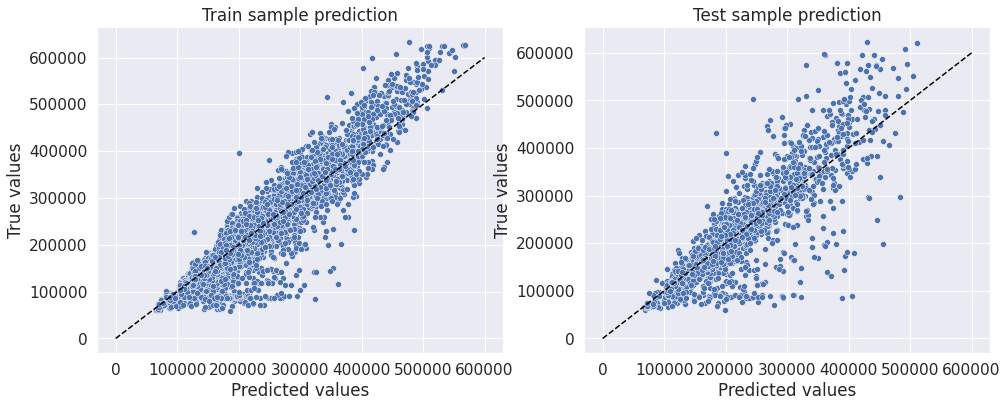

In [777]:
y_train_preds = np.clip(y_train_pred, a_min=5000, a_max=600000)
evaluate_preds(y_train, y_train_pred, y_valid, y_valid_pred)

## 4. Прогнозирование на тестовом датасете

In [778]:
test_df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_3,Helthcare_2,Shops_1,Shops_2,Social_PCA,Low_rise,last_floor,year_cat
0,44,1.0,36.847630,19.094182,5.0,5.0,9.0,0.036122,1,1,0,1,1,1,-1028.894976,0,0,2
1,62,1.0,42.493907,39.832524,10.0,7.0,17.0,0.072158,1,1,1,0,0,0,-4777.954067,0,0,4
2,27,2.0,59.463678,47.463678,9.0,19.0,19.0,0.211401,1,1,0,0,1,1,-3514.935873,0,1,2
3,23,3.0,49.646030,33.893825,6.0,2.0,2.0,0.014073,1,1,0,0,0,1,-4931.952734,1,0,2
4,74,1.0,53.837056,49.837056,3.0,8.0,17.0,0.309479,1,1,4,0,6,1,2308.121905,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,2.0,43.177521,30.339945,5.0,5.0,5.0,0.069660,1,1,4,1,2,1,712.119079,0,0,2
4996,38,3.0,93.698122,124.601250,10.0,21.0,27.0,0.060753,1,1,2,0,7,1,-2619.918653,0,0,5
4997,101,1.0,33.656723,19.003259,5.0,2.0,5.0,0.038693,1,1,1,2,5,1,1126.103009,0,0,2
4998,10,1.0,38.635155,20.976257,9.0,8.0,14.0,0.089040,1,1,5,0,11,1,2569.111321,0,0,2


In [779]:
predictions = rf_model_fin.predict(test_df)
predictions

array([158880.02193247, 120425.19734326, 144415.92256617, ...,
       151857.8276615 , 185855.13179673, 261505.01363593])

In [780]:
submit = pd.read_csv('MyDrive/Python Libraries for Data Science/sample_submission.csv')
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,158880.021932
1,5925,120425.197343
2,960,144415.922566
3,3848,115517.623972
4,746,229278.896871


In [782]:
submit.to_csv('MyDrive/Python Libraries for Data Science/rf_submit.csv', index=False)